In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.optimize import curve_fit
mpl.rcParams['figure.dpi'] = 175

In [2]:
def power_law(gamma, power, A):
    return A * gamma ** (power)

# NORMAL STEP

Text(0.5, 0, 'Lorentz factor')

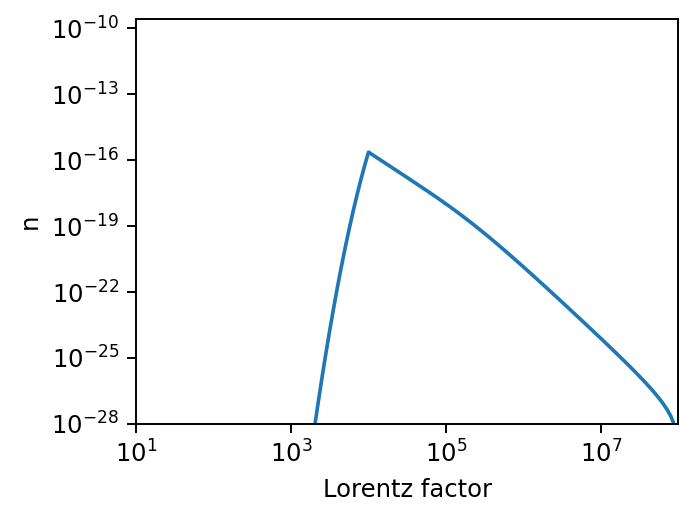

In [3]:
plt.figure(figsize=[4,3])
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\simulation_data.csv",
header=None)
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-28)
plt.xlim(1e1, 1e8)
plt.xlabel("Lorentz factor")

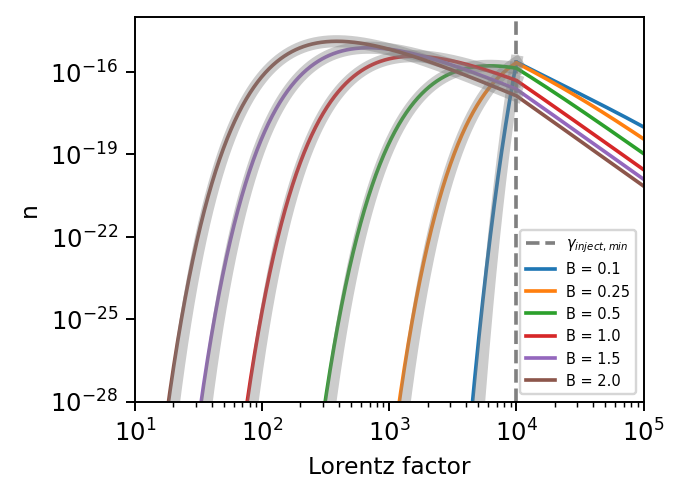

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define your cooling_LHS function with fixed tau and S
def cooling_LHS(gamma, C, tau=1, S=1):  # Example values for tau and S
    return C * np.exp(1)**(1 / (S * tau * gamma)) / gamma ** 2

def plot_with_fit(files, names, fontsize=10, x_range=[1e1, 1e5], y_range=[1e-28, 1e-14], plot_initial=False):
    colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
               "tab:brown", "tab:pink","tab:grey", "tab:olive", "tab:cyan"]
    plt.figure(figsize=[4, 3])
    plt.vlines(1e4, 1e-28, 2e12, "grey", "dashed", lw=1.5, label="$\gamma_{inject,min}$")

    for file, name, colour in zip(files, names, colours[:len(files)]):
        run_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}_run.csv".format(file[:-4]))
        sim_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file), header=None, low_memory=False)
        
        sim_data = sim_data.T
        sim_data.columns = sim_data.iloc[0]
        sim_data = sim_data[1:]
        sim_data.reset_index(drop=True, inplace=True)
        
        plt.plot(sim_data["gamma"], sim_data.iloc[:, -1], label=name, c = colour)

        # Define cooling_LHS with run_data params
        def cooling_LHS(gamma, C, tau=run_data["tau_esc"].values[0], S=run_data["S"].values[0]):
            return C * np.exp(1)**(1 / (S * tau * gamma)) / gamma ** 2

        # Example data
        gamma_data = sim_data["gamma"][sim_data["gamma"] <= run_data["inject_min"].values[0]]
        cooling_data = sim_data.iloc[:, -1][sim_data["gamma"] <= run_data["inject_min"].values[0]]
        
        # Fit the model to the data
        initial_guess = [1]
        popt, pcov = curve_fit(cooling_LHS, gamma_data, cooling_data, p0=initial_guess)
        
        # Optimal parameter
        C_opt = popt[0]
        
        # Generate fitted values
        cooling_fit = cooling_LHS(gamma_data, C_opt)
        
        # Plot the data and the fit
        plt.plot(gamma_data, cooling_fit, c="grey", alpha=0.4, ls="-", lw=5)
    
    if plot_initial:
        plt.plot(sim_data["gamma"], sim_data.iloc[:, 1], "-", c = "black", zorder=0, label="init_dist")
    
    # Add labels and legend with optional fontsize
    plt.ylabel("n", fontsize=fontsize*0.8)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Lorentz factor", fontsize=fontsize*0.8)
    plt.xlim(*x_range)
    plt.ylim(*y_range)
    plt.legend(fontsize=fontsize*0.5)
    #plt.grid(which="minor")
    plt.tight_layout()
    plt.show()

# Example usage with optional fontsize
files = ["B 100.csv", "B 250.csv", "B 500.csv", "B1000.csv", "B1500.csv", "B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plot_with_fit(files, names, fontsize=12)

           4          3          2
-0.002547 x - 0.0477 x - 0.2859 x - 0.8363 x + 7.277


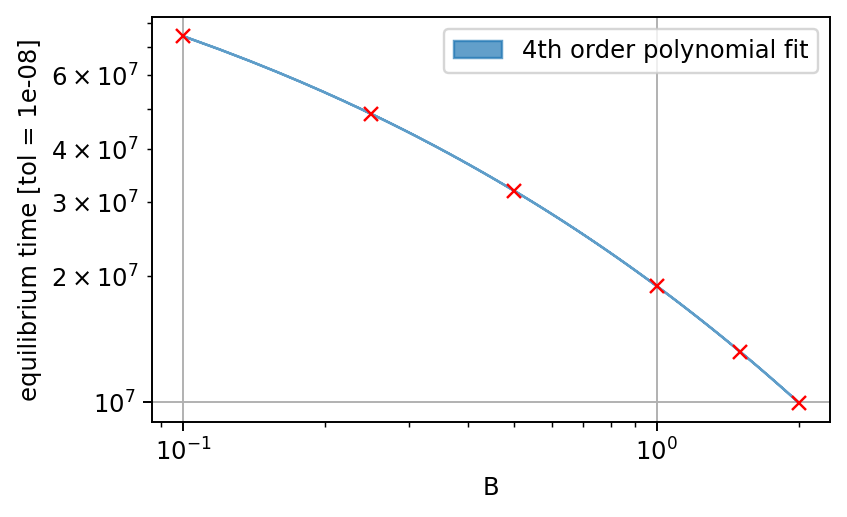

In [14]:
files = ["B 100_run.csv","B 250_run.csv","B 500_run.csv","B1000_run.csv","B1500_run.csv","B2000_run.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]

# Define your model function
def model(x, a, b):
    return a * x**b

x=[]
y=[]
plt.figure(figsize=[5,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file))
    x.append(sim_data["B"][0])
    y.append(sim_data["final_time"][0])
x=np.array(x)
y=np.array(y)
y = y
plt.plot(x, y, "rx", zorder=3)

# Fit a 4th order polynomial to the data
coefficients = np.polyfit(np.log10(x), np.log10(y), 4)
poly = np.poly1d(coefficients)
print(np.poly1d(coefficients))
# Calculate fitted values and errors
x_fit = np.linspace(min(x), max(x), 100)
log_y_fit = poly(np.log10(x_fit))
y_fit = 10**log_y_fit
# Calculate errors (simplified estimate)
residuals = np.log10(y) - poly(np.log10(x))
std_dev = np.std(residuals)
error_margin = std_dev
y_fit_lower = 10**(log_y_fit - error_margin)
y_fit_upper = 10**(log_y_fit + error_margin)
# Plot the fit and error bands
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='tab:blue', alpha=0.7, label="4th order polynomial fit", zorder=2)


plt.ylabel(f"equilibrium time [tol = {sim_data['end_tol'][0]}]")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("B")
plt.legend()
#plt.tight_layout()
plt.grid(which="major", alpha=0.99)

B = 0.1
B = 2.0


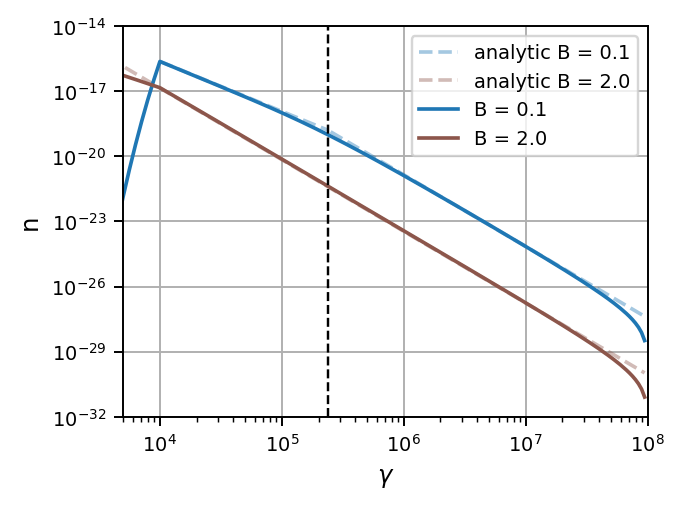

In [28]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))
gamma_inject = 1e4

fs=10

plt.figure(figsize=[4,3])
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
)

gamma = sim_data[sim_data["gamma"] <= gamma_c]
gamma = gamma["gamma"][gamma["gamma"] >= gamma_inject]
plt.plot(gamma, 
         power_law(gamma, -inject_p, C * tau),
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"][sim_data["gamma"] >= gamma_c]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)

S=-5.169027e-09
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[1],
         alpha=0.4, 
         ls="--",
)
gamma = sim_data["gamma"]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 1e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


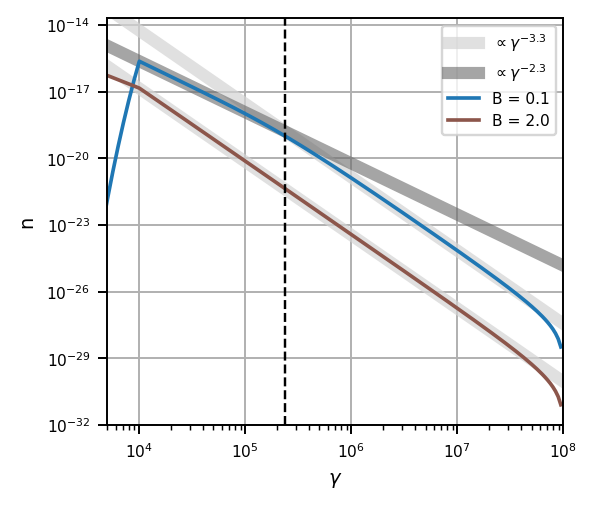

In [197]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=8
lw = 5

plt.figure(figsize=[3.5,3])
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p-1}}}$" 
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p, C * tau), 
         c = "dimgrey",
         alpha=0.6, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p}}}$" 
)  

S=-5.169027e-09

plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 2e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


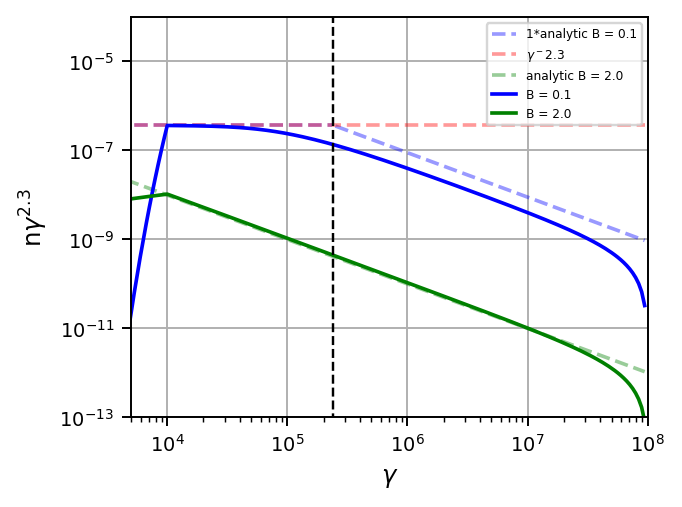

In [21]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["blue", "green"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=10

plt.figure(figsize=[4,3])
plt.plot(sim_data["gamma"][sim_data["gamma"] < gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] < gamma_c], -inject_p, C * tau) * sim_data["gamma"][sim_data["gamma"] < gamma_c]**2.3, 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"{A}*analytic B = 0.1"
)
plt.plot(sim_data["gamma"][sim_data["gamma"] > gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] > gamma_c], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"][sim_data["gamma"] > gamma_c]**2.3, 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -2.3, C * tau)* sim_data["gamma"]**2.3, 
         c= "red", 
         alpha=0.4, 
         ls="--",
         label=f"$\gamma^{-2.3}$"
)


S=-1.16e-08

plt.plot(sim_data["gamma"], 
         A*power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"]**2.3, 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1] * sim_data["gamma"]**2.3, label=name, c=colour)
    print(name)
plt.ylabel("n$\gamma^{2.3}$", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.5)
plt.xlim(5e3, 1e8)
plt.ylim(1e-13, 1e-4)
plt.vlines(gamma_c, 1e-14, 1, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

# LOG STEP

Text(0.5, 0, 'Lorentz factor')

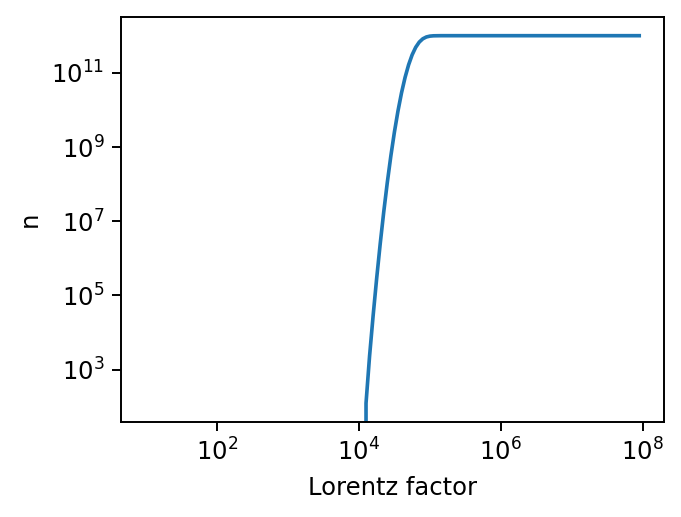

In [143]:
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\log_step_simulation_data.csv",
header=None,
low_memory=False,
)
plt.figure(figsize=[4,3])
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
#plt.ylim(1e-28)
#plt.xlim(1e1, 1e5)
plt.xlabel("Lorentz factor")

# STEADY STATE

0                  0.0
1                 -0.0
2                 -0.0
3                  0.0
4                  0.0
             ...      
6998     -1759339000.0
6999   -190593500000.0
7000               0.0
7001               NaN
7002               NaN
Name: 1.044808e-15, Length: 7003, dtype: object


Text(0.5, 0, 'Lorentz factor')

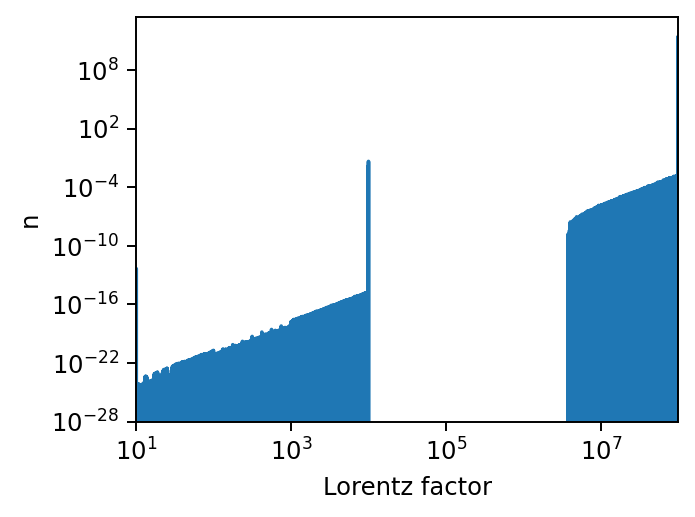

In [44]:
plt.figure(figsize=[4,3])
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\simulation_data.csv",
header=None)
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
print(sim_data.iloc[:,-1])
#plt.plot(sim_data["gamma"], sim_data.iloc[:,1])
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-28)
plt.xlim(1e1, 1e8)
plt.xlabel("Lorentz factor")

B = 0.1
B = 0.25
B = 0.5
B = 1.0
B = 1.5
B = 2.0


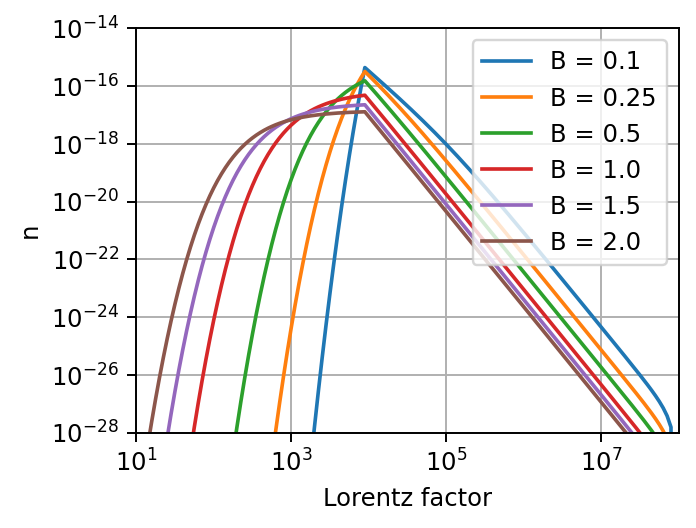

In [7]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.transpose()
    pd.options.display.float_format = '{:.10e}'.format
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    #sim_data.reset_index(drop=True, inplace=True)
    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name)
    print(name)
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Lorentz factor")
plt.xlim(1e1,1e8)
plt.ylim(1e-28, 1e-14)
#plt.vlines(1e4, 1e-28, 1e-7, "black", "dashed")
plt.legend()
#plt.tight_layout()
plt.grid()

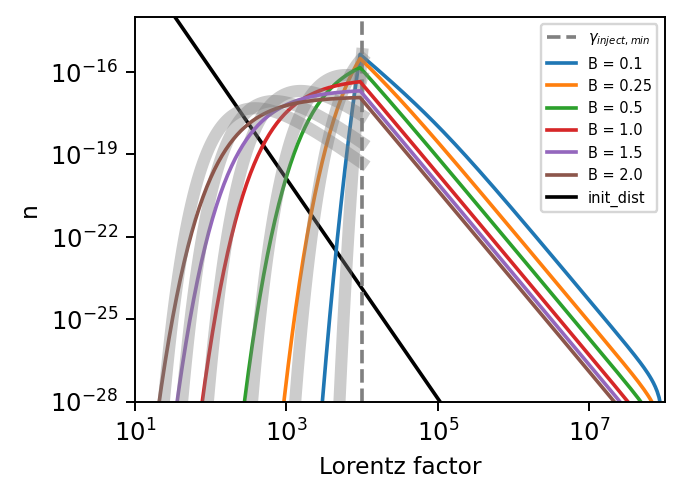

In [75]:
# Example usage with optional fontsize
files = ["steady_state\B 100.csv", "steady_state\B 250.csv", "steady_state\B 500.csv", 
         "steady_state\B1000.csv", "steady_state\B1500.csv", "steady_state\B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plot_with_fit(files, names, fontsize=12, plot_initial=True,x_range=[1e1, 1e8])

B = 0.1
B = 2.0


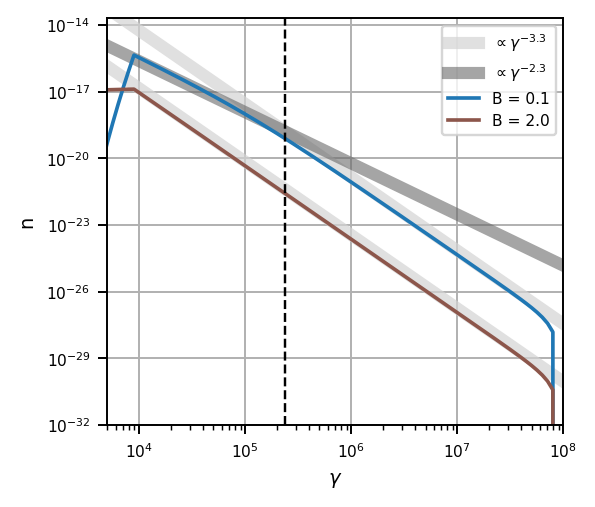

In [8]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.292257e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=8
lw = 5


plt.figure(figsize=[3.5,3])
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p-1}}}$" 
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p, C * tau), 
         c = "dimgrey",
         alpha=0.6, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p}}}$" 
)  

S=-5.169027e-09

plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 2e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


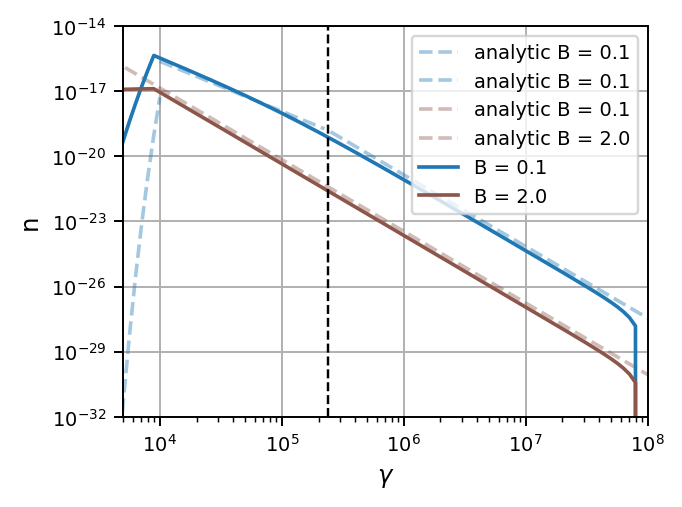

In [16]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))
gamma_inject = 1e4

fs=10

plt.figure(figsize=[4,3])
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)

gamma = sim_data[sim_data["gamma"] <= gamma_c]
gamma = gamma["gamma"][gamma["gamma"] >= gamma_inject]
plt.plot(gamma, 
         power_law(gamma, -inject_p, C * tau), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"][sim_data["gamma"] >= gamma_c]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)

S=-5.169027e-09
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[1],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 1e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

In [176]:
sim_data.iloc[:,0]

0                  0.0
1                 10.0
2            10.292005
3            10.592537
4            10.901845
            ...       
558    91727593.538978
559    94406087.628592
560    97162795.157711
561        100000000.0
562                NaN
Name: gamma, Length: 563, dtype: object